In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('region.csv')
df1.head()

,state,region
0,Alabama,South
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,South
4,California,West


In [3]:
df2 = pd.read_csv('states_gdp.csv')
df2.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [4]:
df3 = pd.read_csv('universities_data.csv')
df3.head(10)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,"-875,458","332,144",Not applicable,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,"-869,651","3,480,563",Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN
7,100830,Auburn University at Montgomery,2013,36117-3596,Doctor's degree - research/scholarship,Montgomery County,"-861,774","3,236,994",Not applicable,Implied no,...,48.0,48.0,5.0,5.0,48.0,36.0,36.0,0.0,10736.0,NaN
8,100858,Auburn University,2013,36849,Doctor's degree - research/scholarship and pro...,Lee County,"-854,924","326,002",Not applicable,Implied no,...,13.0,13.0,3.0,1.0,65.0,32.0,31.0,3.0,22092.0,NaN
9,100937,Birmingham Southern College,2013,35254,Bachelor's degree,Jefferson County,"-868,536","3,351,545",United Methodist,Implied no,...,21.0,21.0,9.0,26.0,96.0,80.0,80.0,7.0,NaN,37598.0


In [5]:
df3.duplicated().sum()

0

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [7]:
df3.isnull().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [8]:
df3['Percent of freshmen receiving student loan aid'].dtype

dtype('float64')

In [9]:
df3['Religious affiliation'].unique()

array(['Not applicable', 'Churches of Christ', 'United Methodist',
       'Lutheran Church - Missouri Synod', 'Baptist',
       'Christian Methodist Episcopal', 'Southern Baptist',
       'Seventh Day Adventists', 'Roman Catholic',
       'Presbyterian Church (USA)', 'United Church of Christ',
       'Assemblies of God Church', 'American Baptist', 'Undenominational',
       'Evangelical Lutheran Church',
       'Christian Church (Disciples of Christ)',
       'Mennonite Brethren Church', 'Jewish', 'Interdenominational',
       'Christian Churches and Churches of Christ',
       'Church of the Nazarene', 'Christ and Missionary Alliance Church',
       'African Methodist Episcopal',
       'Evangelical Free Church of America', 'Church of God',
       'The Presbyterian Church in America',
       'Pentecostal Holiness Church', nan,
       'Latter Day Saints (Mormon Church)', 'Free Methodist',
       'Evangelical Covenant Church of America', 'Missionary Church Inc',
       'Friends', 'Menno

In [10]:
df3['Religious affiliation'].replace('Not applicable',np.nan, inplace=True)

In [11]:
df3['Religious affiliation'].unique()

array([nan, 'Churches of Christ', 'United Methodist',
       'Lutheran Church - Missouri Synod', 'Baptist',
       'Christian Methodist Episcopal', 'Southern Baptist',
       'Seventh Day Adventists', 'Roman Catholic',
       'Presbyterian Church (USA)', 'United Church of Christ',
       'Assemblies of God Church', 'American Baptist', 'Undenominational',
       'Evangelical Lutheran Church',
       'Christian Church (Disciples of Christ)',
       'Mennonite Brethren Church', 'Jewish', 'Interdenominational',
       'Christian Churches and Churches of Christ',
       'Church of the Nazarene', 'Christ and Missionary Alliance Church',
       'African Methodist Episcopal',
       'Evangelical Free Church of America', 'Church of God',
       'The Presbyterian Church in America',
       'Pentecostal Holiness Church', 'Latter Day Saints (Mormon Church)',
       'Free Methodist', 'Evangelical Covenant Church of America',
       'Missionary Church Inc', 'Friends', 'Mennonite Church',
       'Bre

In [12]:
df3.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",NaN,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",NaN,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",NaN,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",NaN,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [13]:
df3.isnull().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
Religious affiliation                                       949
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [15]:
df3.describe()

,ID number,year,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1534.000000,1534.0,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,1169.000000,1182.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,189091.037810,2013.0,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,578.297690,480.514382,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,58641.915456,0.0,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,70.169391,72.464475,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,100654.000000,2013.0,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,360.000000,280.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,153148.500000,2013.0,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,530.000000,430.000000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,186508.000000,2013.0,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,570.000000,470.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,215730.000000,2013.0,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,620.000000,510.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,456490.000000,2013.0,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,800.000000,770.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


In [16]:
df3.columns.sort_values(ascending=False)

Index(['year', 'ZIP code', 'Undergraduate enrollment',
       'Tuition and fees, 2013-14', 'Tuition and fees, 2012-13',
       'Tuition and fees, 2011-12', 'Tuition and fees, 2010-11',
       'Tribal college',
       'Total price for out-of-state students living on campus 2013-14',
       'Total price for in-state students living on campus 2013-14',
       ...
       'Certificates of 2 but less than 4-years awarded',
       'Certificates of 1 but less than 2-years awarded',
       'Carnegie Classification 2010: Basic', 'Bachelor's degrees awarded',
       'Associate's degrees awarded', 'Applicants total',
       'Admissions yield - total', 'Admissions total',
       'ACT Composite 75th percentile score',
       'ACT Composite 25th percentile score'],
      dtype='object', length=145)

In [17]:
boolen_mask = df3[['Applicants total', 'Admissions total', 'Enrolled total']].isna().any(axis=1)

df3.loc[boolen_mask, ['Name', 'year', 'Applicants total', 'Admissions total', 'Enrolled total']]

,Name,year,Applicants total,Admissions total,Enrolled total
2,Amridge University,2013,NaN,NaN,NaN
6,Athens State University,2013,NaN,NaN,NaN
10,Concordia College Alabama,2013,NaN,NaN,NaN
11,Faulkner University,2013,NaN,NaN,NaN
16,Miles College,2013,NaN,NaN,NaN
...,...,...,...,...,...
1526,University of the West,2013,NaN,NaN,NaN
1527,Averett University-Non-Traditional Programs,2013,NaN,NaN,NaN
1528,LIU Riverhead,2013,NaN,NaN,NaN
1531,Ottawa University-Online,2013,NaN,NaN,NaN


### After investigating about 5 random universities that don't have a applicant at 2013, Found that most of this universities closed or had an accident at this year

- so we will delete this nulls
- then investigate the reminder of universties

In [18]:
cleaned_df = df3[df3[['Applicants total', 'Admissions total', 'Enrolled total']].notna().any(axis=1)]
cleaned_df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",NaN,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",NaN,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",NaN,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",NaN,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,"-875,458","332,144",NaN,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,446048,Ave Maria University,2013,34142-9505,Doctor's degree - other,Collier County,"-814,411","2,633,711",Roman Catholic,Implied no,...,31.0,31.0,4.0,37.0,100.0,58.0,58.0,5.0,NaN,1670.0
1525,448840,University of South Florida-St Petersburg,2013,33701-9807,Master's degree,Pinellas County,"-826,357","2,776,262",NaN,Implied no,...,45.0,44.0,5.0,80.0,43.0,51.0,51.0,1.0,3609.0,NaN
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,"-82,563","2,739,177",NaN,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,"-740,123","4,070,686",Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0


In [19]:
first_ha = cleaned_df[['ID number','Name','Applicants total', 'Admissions total', 'Enrolled total']]
first_ha

,ID number,Name,Applicants total,Admissions total,Enrolled total
0,100654,Alabama A & M University,6142.0,5521.0,1104.0
1,100663,University of Alabama at Birmingham,5689.0,4934.0,1773.0
3,100706,University of Alabama in Huntsville,2054.0,1656.0,651.0
4,100724,Alabama State University,10245.0,5251.0,1479.0
5,100751,The University of Alabama,30975.0,17515.0,6454.0
...,...,...,...,...,...
1516,446048,Ave Maria University,1611.0,960.0,254.0
1525,448840,University of South Florida-St Petersburg,3195.0,1406.0,562.0
1529,451671,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0
1530,454184,The Kingâ€™s College,3033.0,2158.0,127.0


In [20]:
first_ha['preferablity percent'] = first_ha['Enrolled total'] / first_ha['Admissions total']
first_ha.head()

,ID number,Name,Applicants total,Admissions total,Enrolled total,preferablity percent
0,100654,Alabama A & M University,6142.0,5521.0,1104.0,0.199964
1,100663,University of Alabama at Birmingham,5689.0,4934.0,1773.0,0.359343
3,100706,University of Alabama in Huntsville,2054.0,1656.0,651.0,0.393116
4,100724,Alabama State University,10245.0,5251.0,1479.0,0.281661
5,100751,The University of Alabama,30975.0,17515.0,6454.0,0.368484


<Axes: xlabel='Applicants total', ylabel='preferablity percent'>

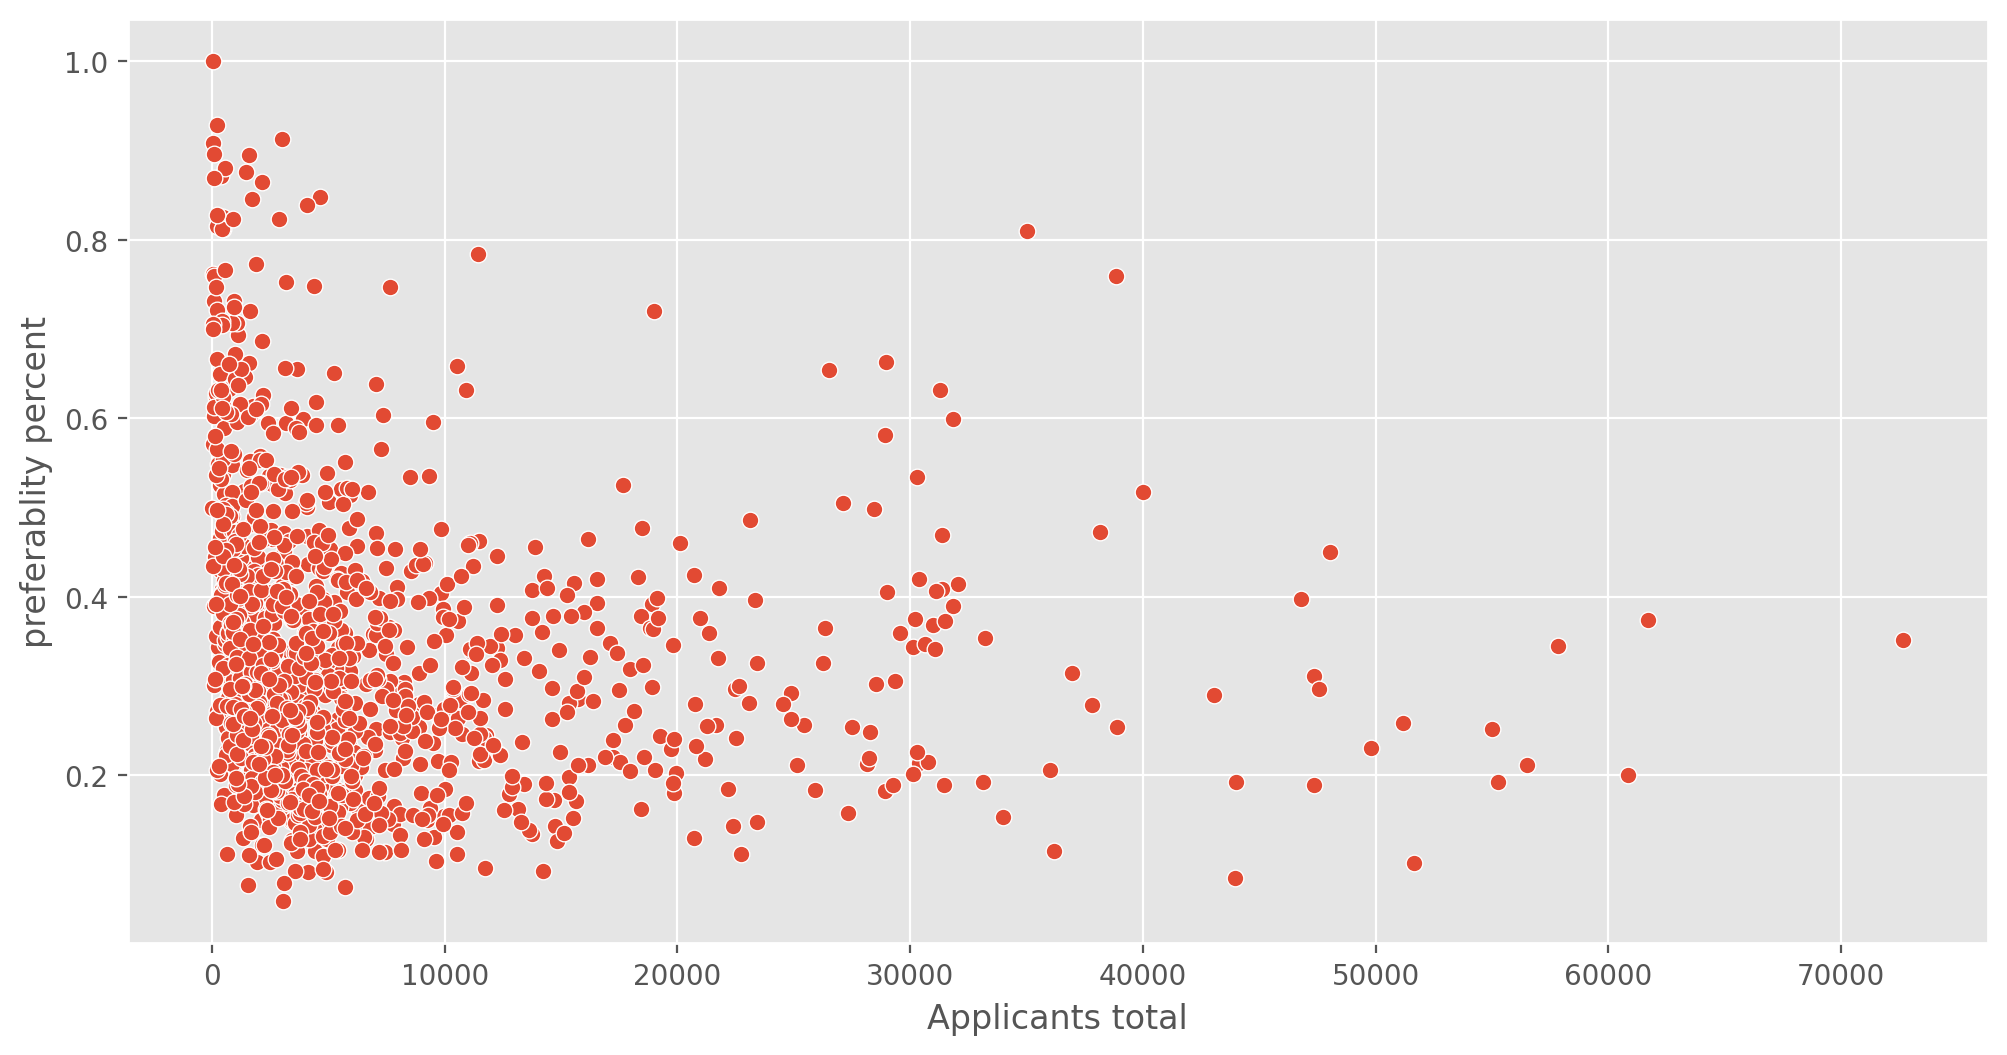

In [21]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data = first_ha, x = 'Applicants total', y = 'preferablity percent')

<Axes: xlabel='Applicants total', ylabel='Enrolled total'>

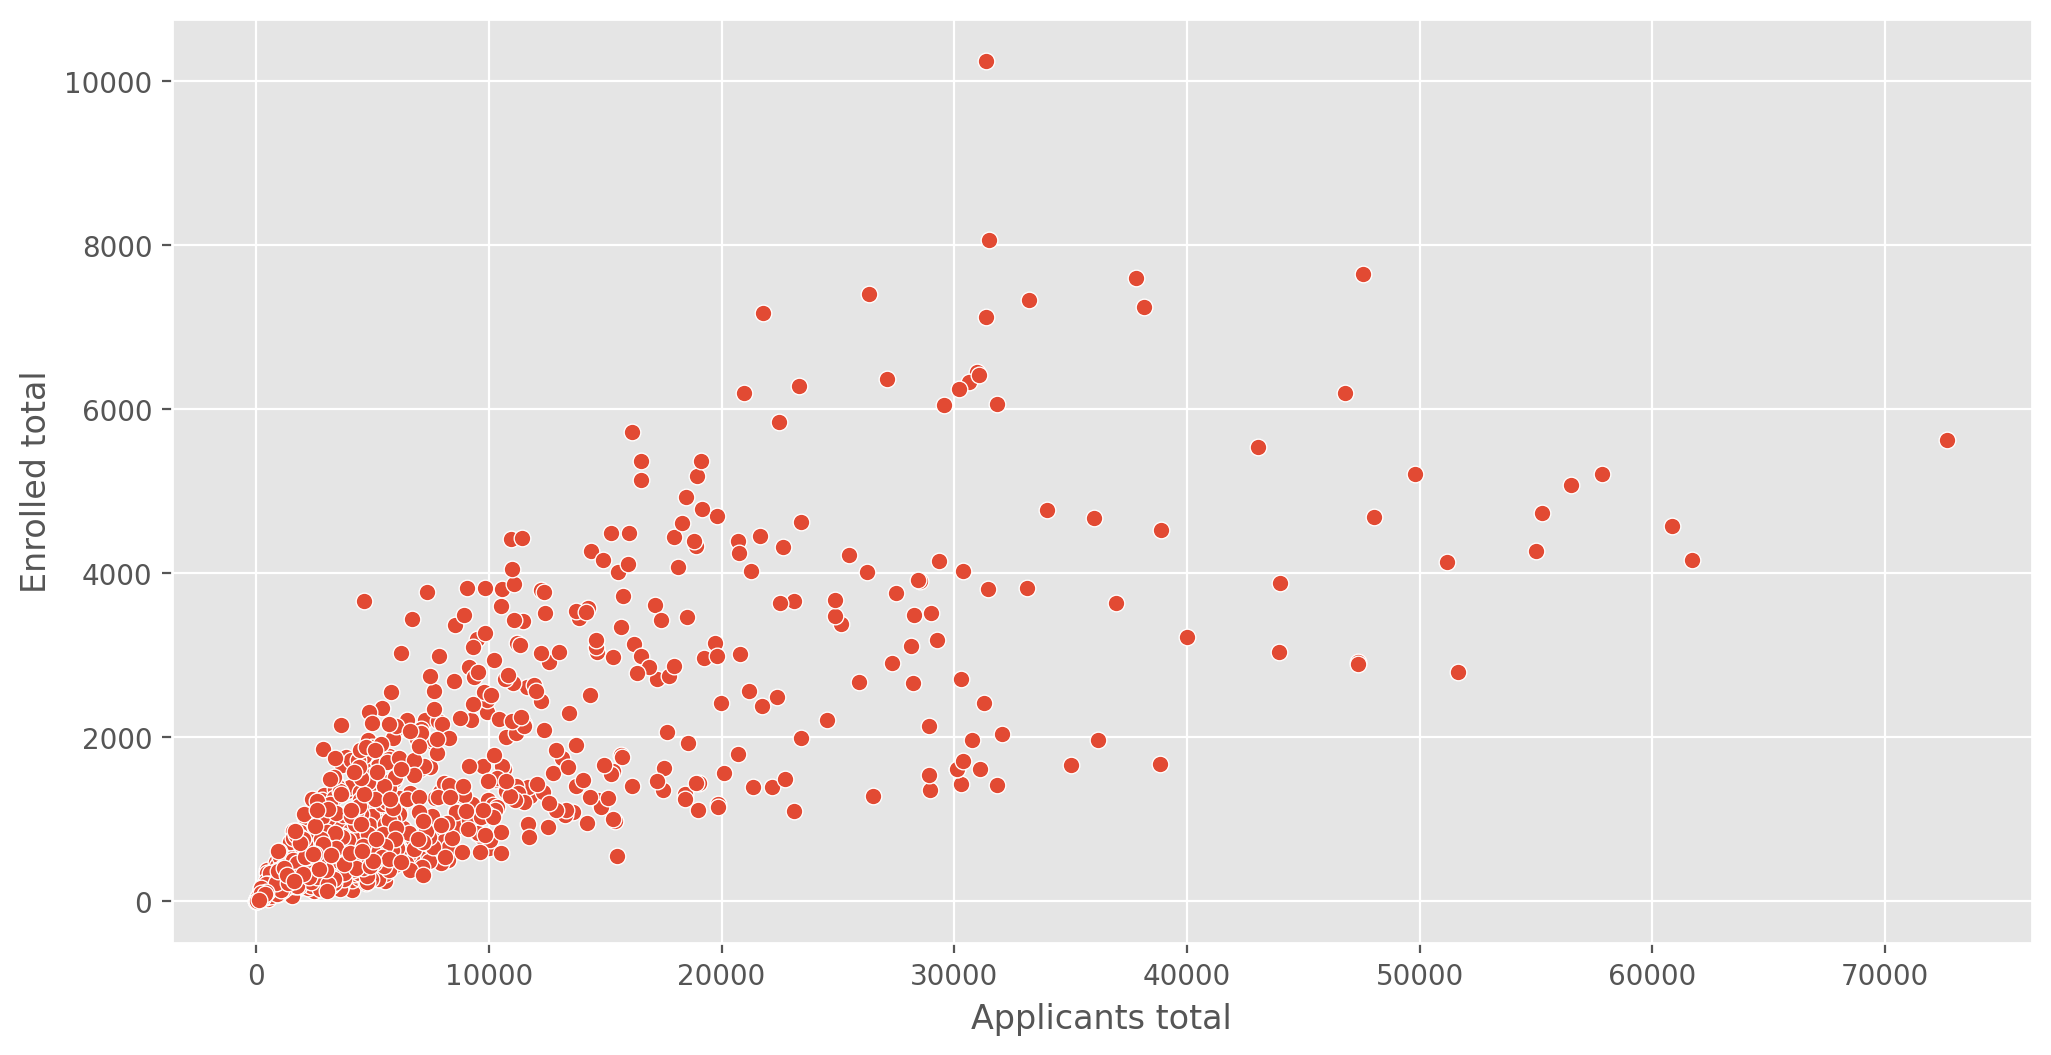

In [22]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data=first_ha, x='Applicants total', y='Enrolled total')

In [23]:
second_pu = cleaned_df[['Applicants total', 'Admissions total', "Admissions yield - total"]]
second_pu['percentage of admissions'] = second_pu['Admissions total'] / second_pu['Applicants total']

In [24]:
second_pu[['percentage of admissions', "Admissions yield - total"]].corr()

,percentage of admissions,Admissions yield - total
percentage of admissions,1.000000,-0.071144
Admissions yield - total,-0.071144,1.000000


<Axes: xlabel='percentage of admissions', ylabel='Admissions yield - total'>

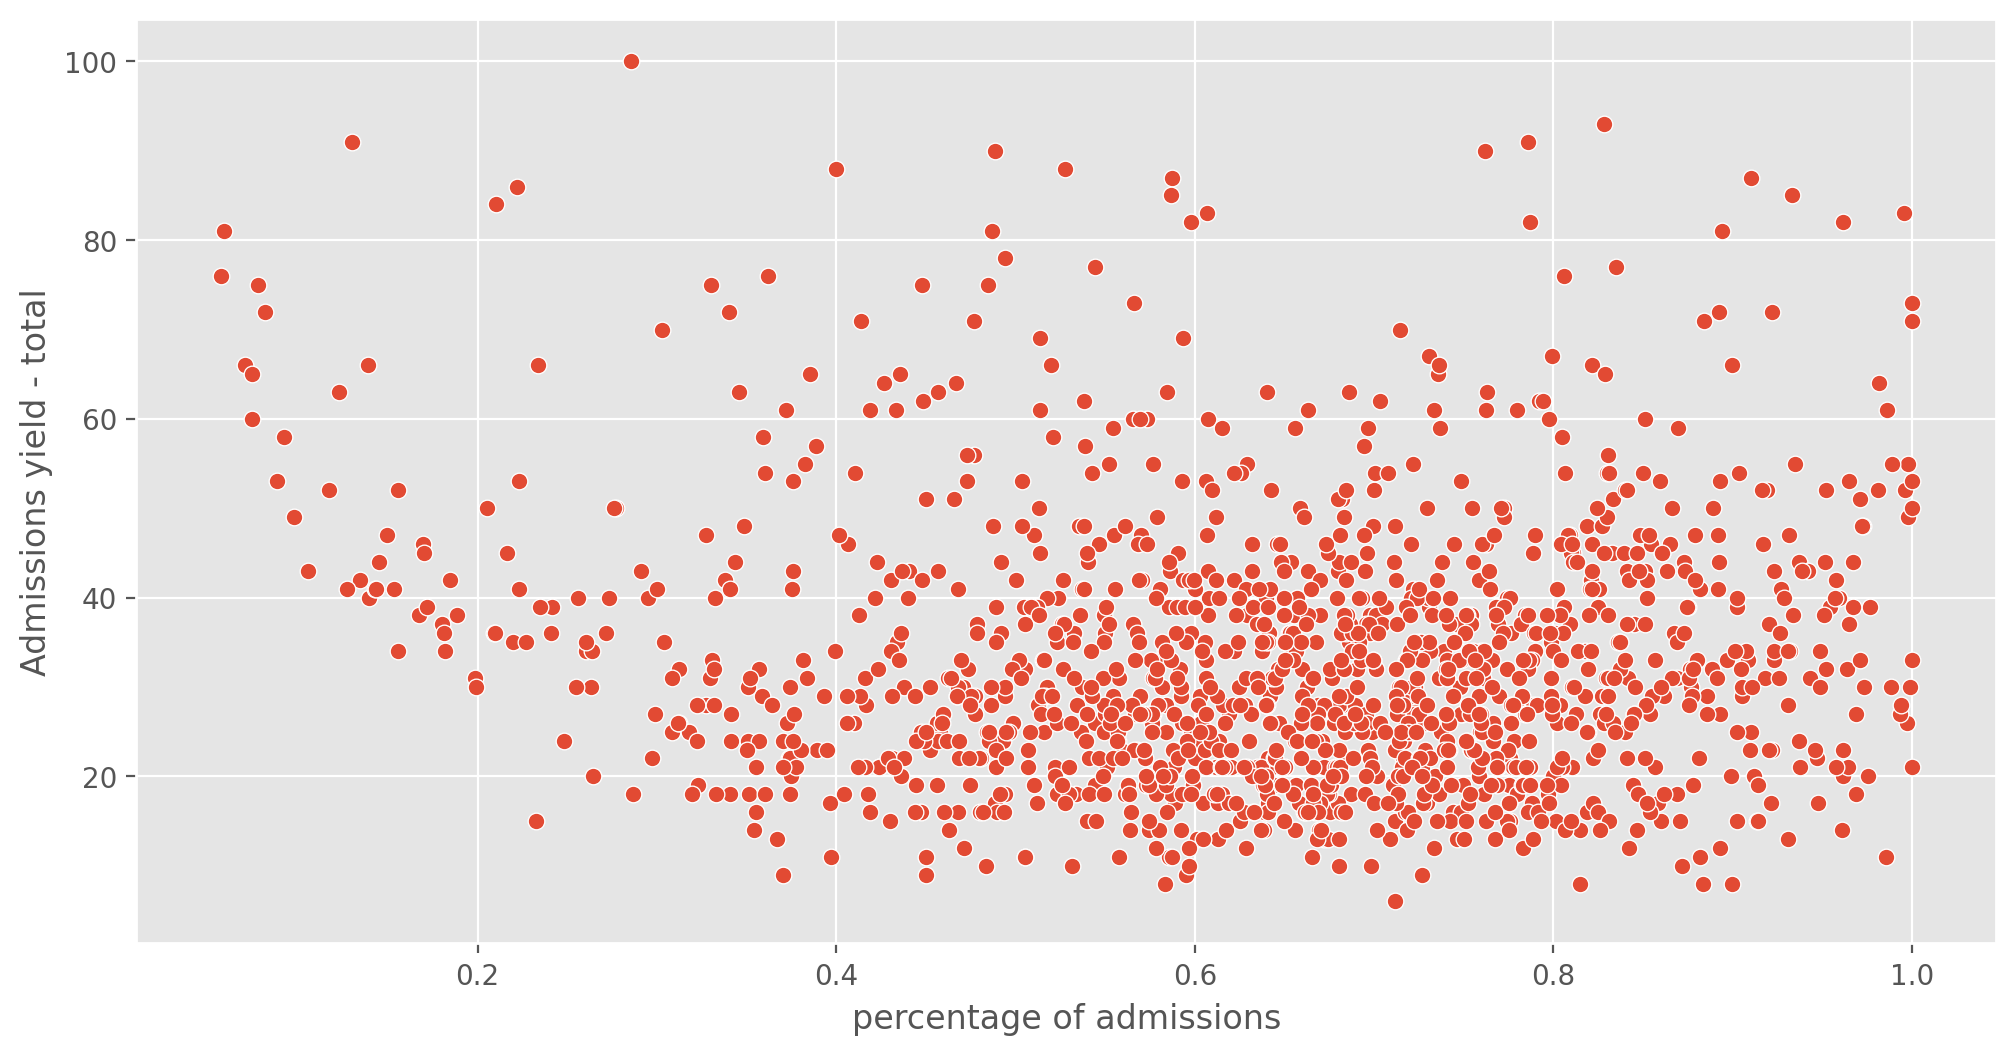

In [25]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data=second_pu, x='percentage of admissions', y="Admissions yield - total")

In [26]:
third_s = cleaned_df[['Control of institution', 'Applicants total', "Admissions yield - total"]]
third_s.head()

,Control of institution,Applicants total,Admissions yield - total
0,Public,6142.0,20.0
1,Public,5689.0,36.0
3,Public,2054.0,39.0
4,Public,10245.0,28.0
5,Public,30975.0,37.0


In [27]:
third_s['Control of institution'].unique()

array(['Public', 'Private not-for-profit'], dtype=object)

<Axes: xlabel='Admissions yield - total', ylabel='Count'>

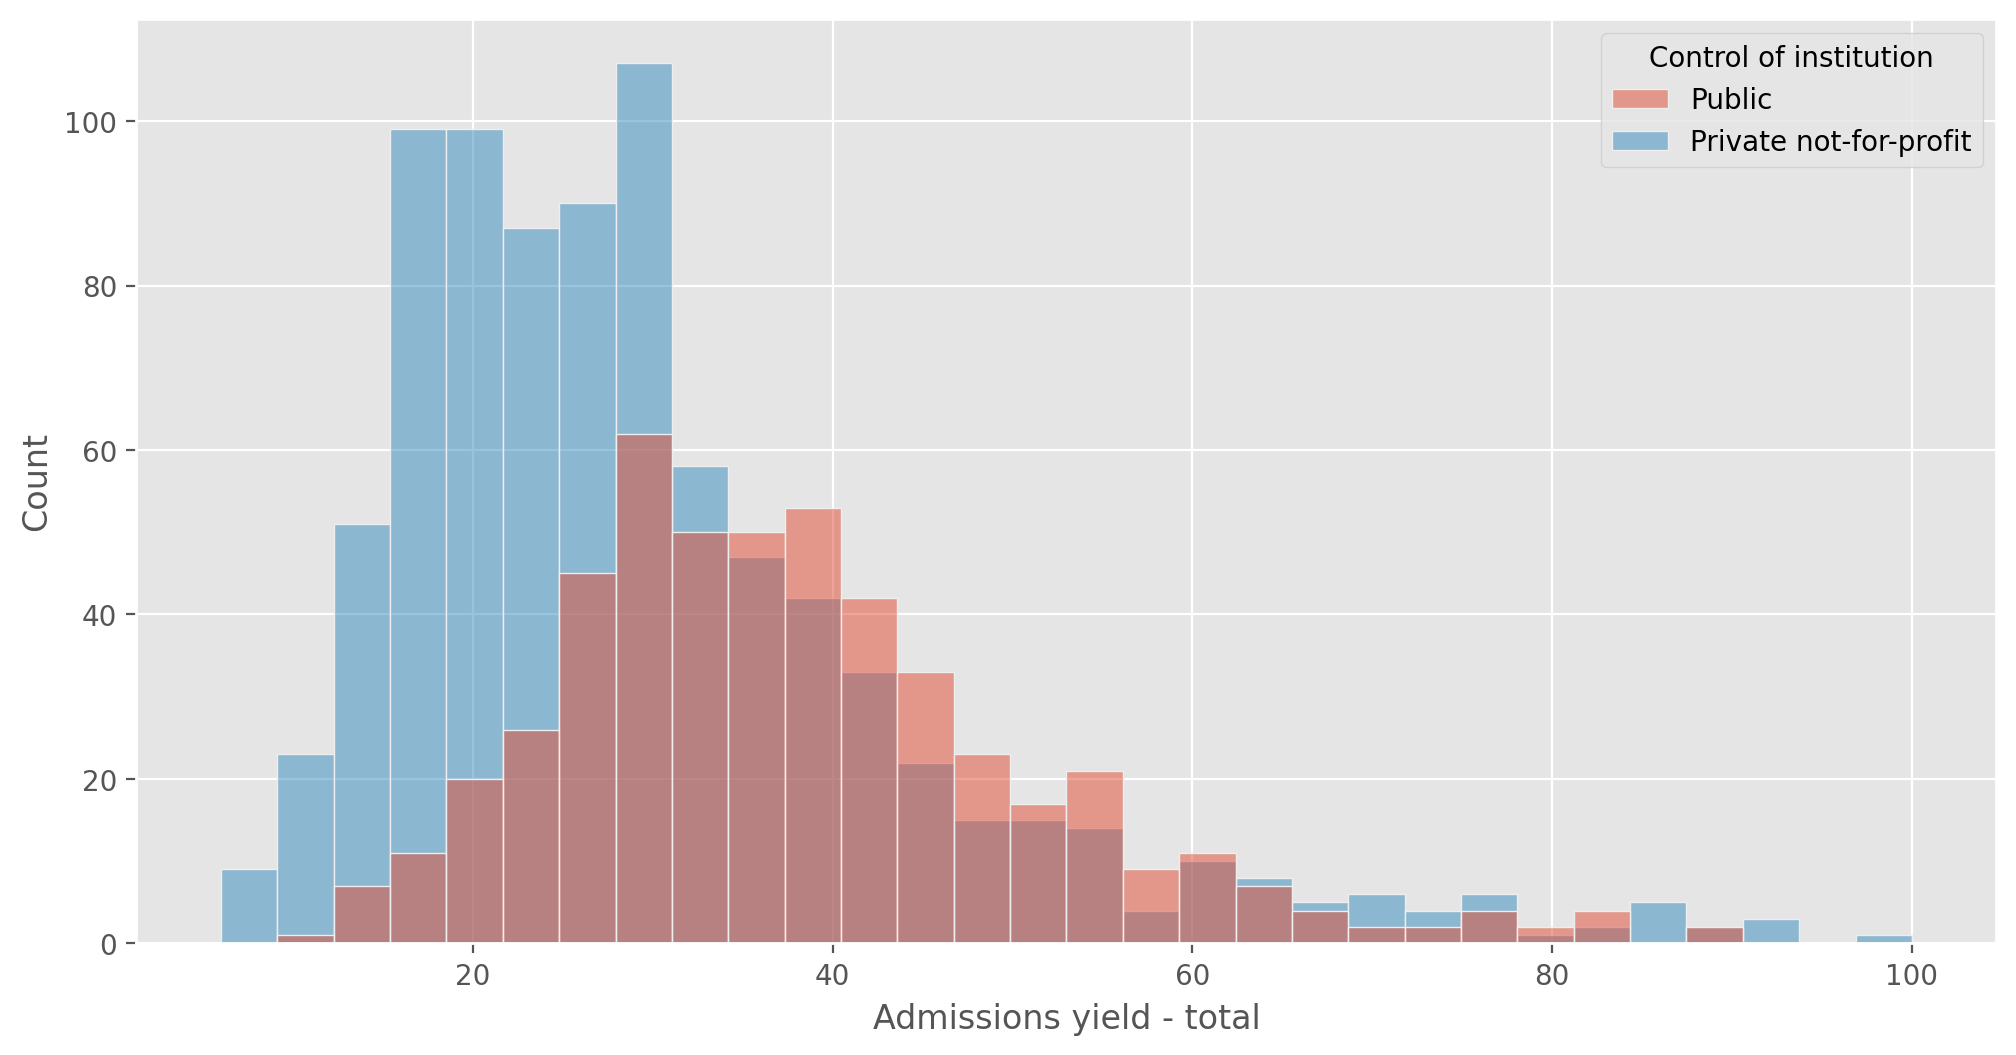

In [28]:
plt.figure(figsize = (12,6), dpi = 200)
sns.histplot(data=third_s, x='Admissions yield - total', hue='Control of institution')

In [29]:
fourth_s = cleaned_df[['Tuition and fees, 2013-14', 'Admissions yield - total']]
fourth_s.head()

,"Tuition and fees, 2013-14",Admissions yield - total
0,7182.0,20.0
1,7206.0,36.0
3,9192.0,39.0
4,8720.0,28.0
5,9450.0,37.0


<Axes: xlabel='Tuition and fees, 2013-14', ylabel='Admissions yield - total'>

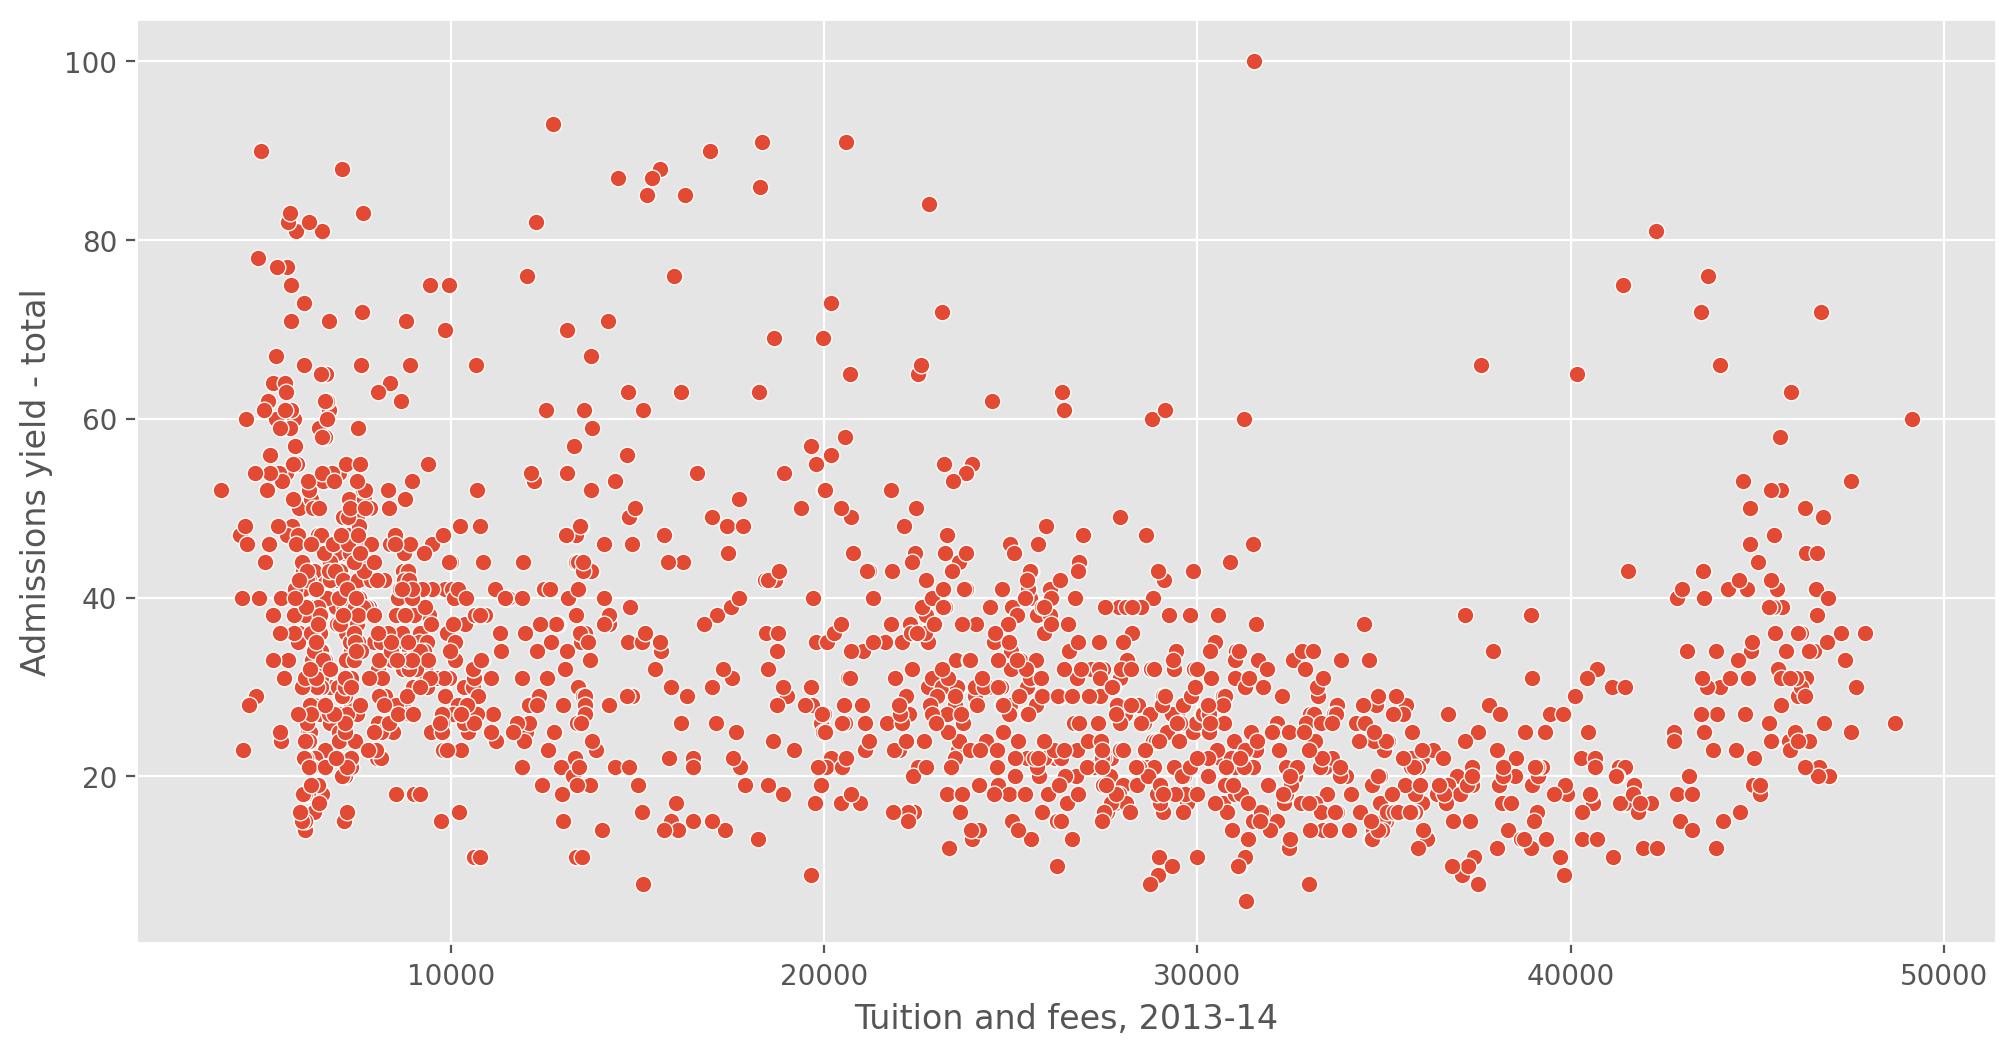

In [30]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(data=fourth_s, x='Tuition and fees, 2013-14', y='Admissions yield - total')

In [32]:
numOfenrolled_20000 = fourth_s[(fourth_s['Tuition and fees, 2013-14'] < 20000) & (fourth_s['Admissions yield - total'] > 50)]
numOfenrolled_20000.describe()

,"Tuition and fees, 2013-14",Admissions yield - total
count,121.00000,121.000000
mean,9356.14876,63.950413
std,4492.50462,11.577170
min,3850.00000,51.000000
25%,5786.00000,54.000000
50%,7276.00000,61.000000
75%,13120.00000,71.000000
max,19996.00000,93.000000


In [34]:
numOfenrolled_40000 = fourth_s[(fourth_s['Tuition and fees, 2013-14'] < 40000) & (fourth_s['Tuition and fees, 2013-14'] >= 20000) & (fourth_s['Admissions yield - total'] > 50)]
numOfenrolled_40000.describe()


,"Tuition and fees, 2013-14",Admissions yield - total
count,23.000000,23.000000
mean,24574.347826,64.521739
std,4467.256933,12.431154
min,20040.000000,52.000000
25%,21245.000000,55.500000
50%,23210.000000,61.000000
75%,26400.000000,66.000000
max,37600.000000,100.000000


In [35]:
numOfenrolled_50000 = fourth_s[(fourth_s['Tuition and fees, 2013-14'] < 50000) & (fourth_s['Tuition and fees, 2013-14'] >= 40000) & (fourth_s['Admissions yield - total'] > 50)]
numOfenrolled_50000.describe()

,"Tuition and fees, 2013-14",Admissions yield - total
count,14.000000,14.000000
mean,44678.428571,64.142857
std,2408.063528,9.882830
min,40170.000000,52.000000
25%,43544.250000,54.250000
50%,44981.500000,64.000000
75%,45823.750000,72.000000
max,49138.000000,81.000000


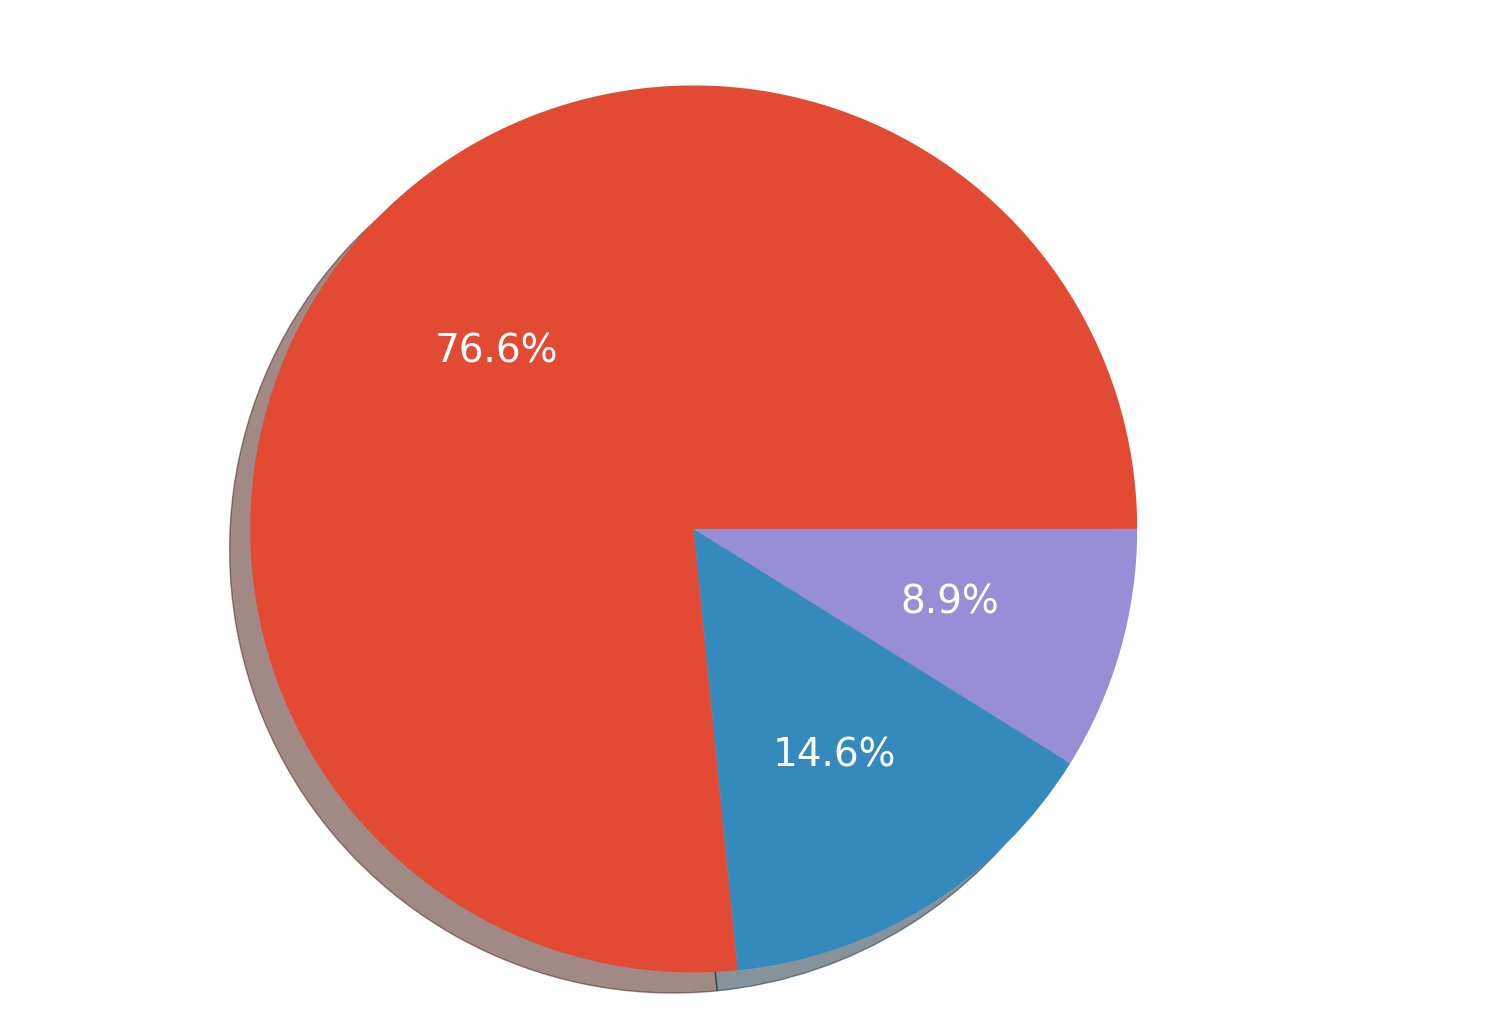

In [36]:
Tuition = {'less than 20000':len(numOfenrolled_20000),
           'less than 40000':len(numOfenrolled_40000),
           'less than 50000':len(numOfenrolled_50000)}

plt.figure(figsize=(12,6), dpi=200)
plt.pie(x=Tuition.values(), labels=Tuition.keys(), radius=1.2, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 14, 'color':'w'})
plt.title("Tuition and fees with rate of admission > 0.5", color='w')

plt.show()

In [39]:
fifth_s = cleaned_df[['Admissions yield - total',
                             'Total price for in-state students living on campus 2013-14',
                             'Total price for out-of-state students living on campus 2013-14']]

fifth_s.head()

,Admissions yield - total,Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14
0,20.0,21849.0,27441.0
1,36.0,22495.0,31687.0
3,39.0,23466.0,35780.0
4,28.0,18286.0,25222.0
5,37.0,27000.0,41500.0


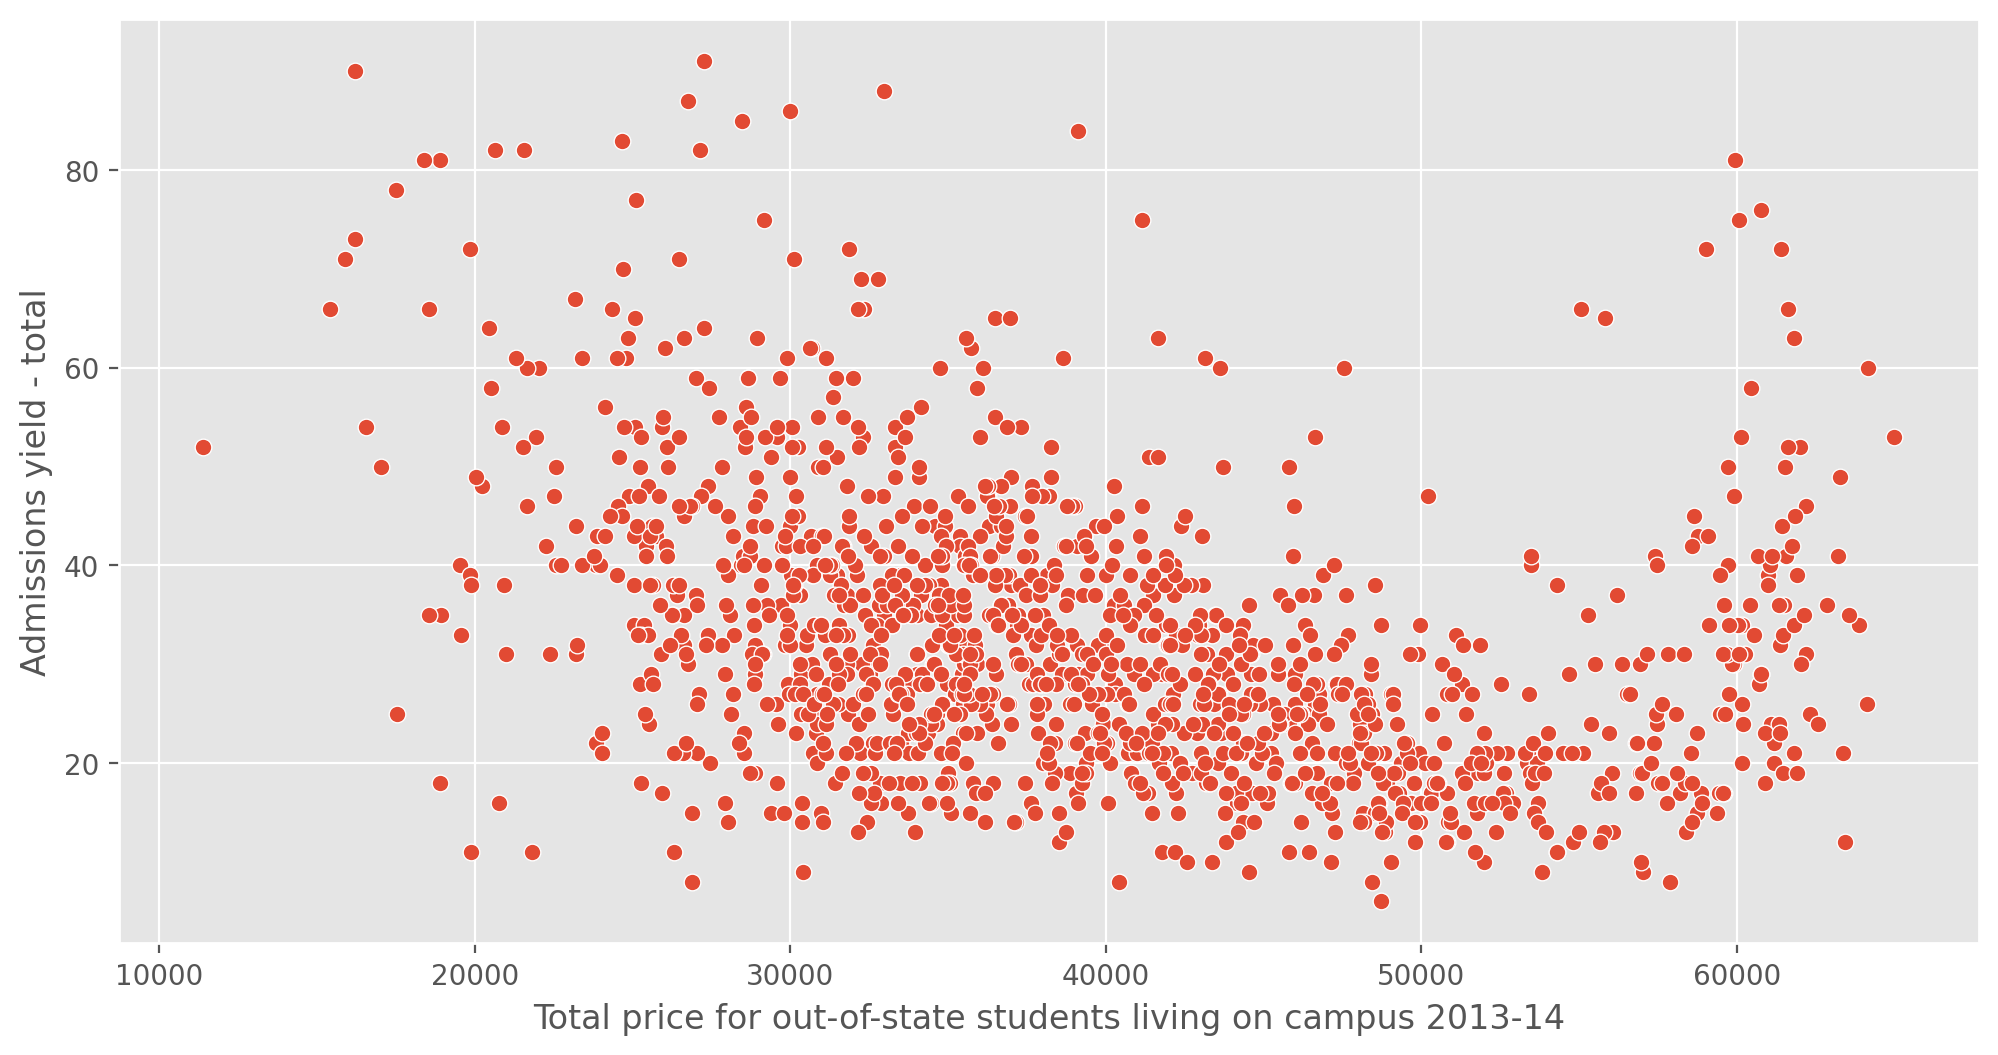

In [41]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=fifth_s, x='Total price for out-of-state students living on campus 2013-14', y='Admissions yield - total')
plt.show()

In [42]:
fifth_s[['Total price for out-of-state students living on campus 2013-14', 'Admissions yield - total']].corr()

,Total price for out-of-state students living on campus 2013-14,Admissions yield - total
Total price for out-of-state students living on campus 2013-14,1.000000,-0.360452
Admissions yield - total,-0.360452,1.000000


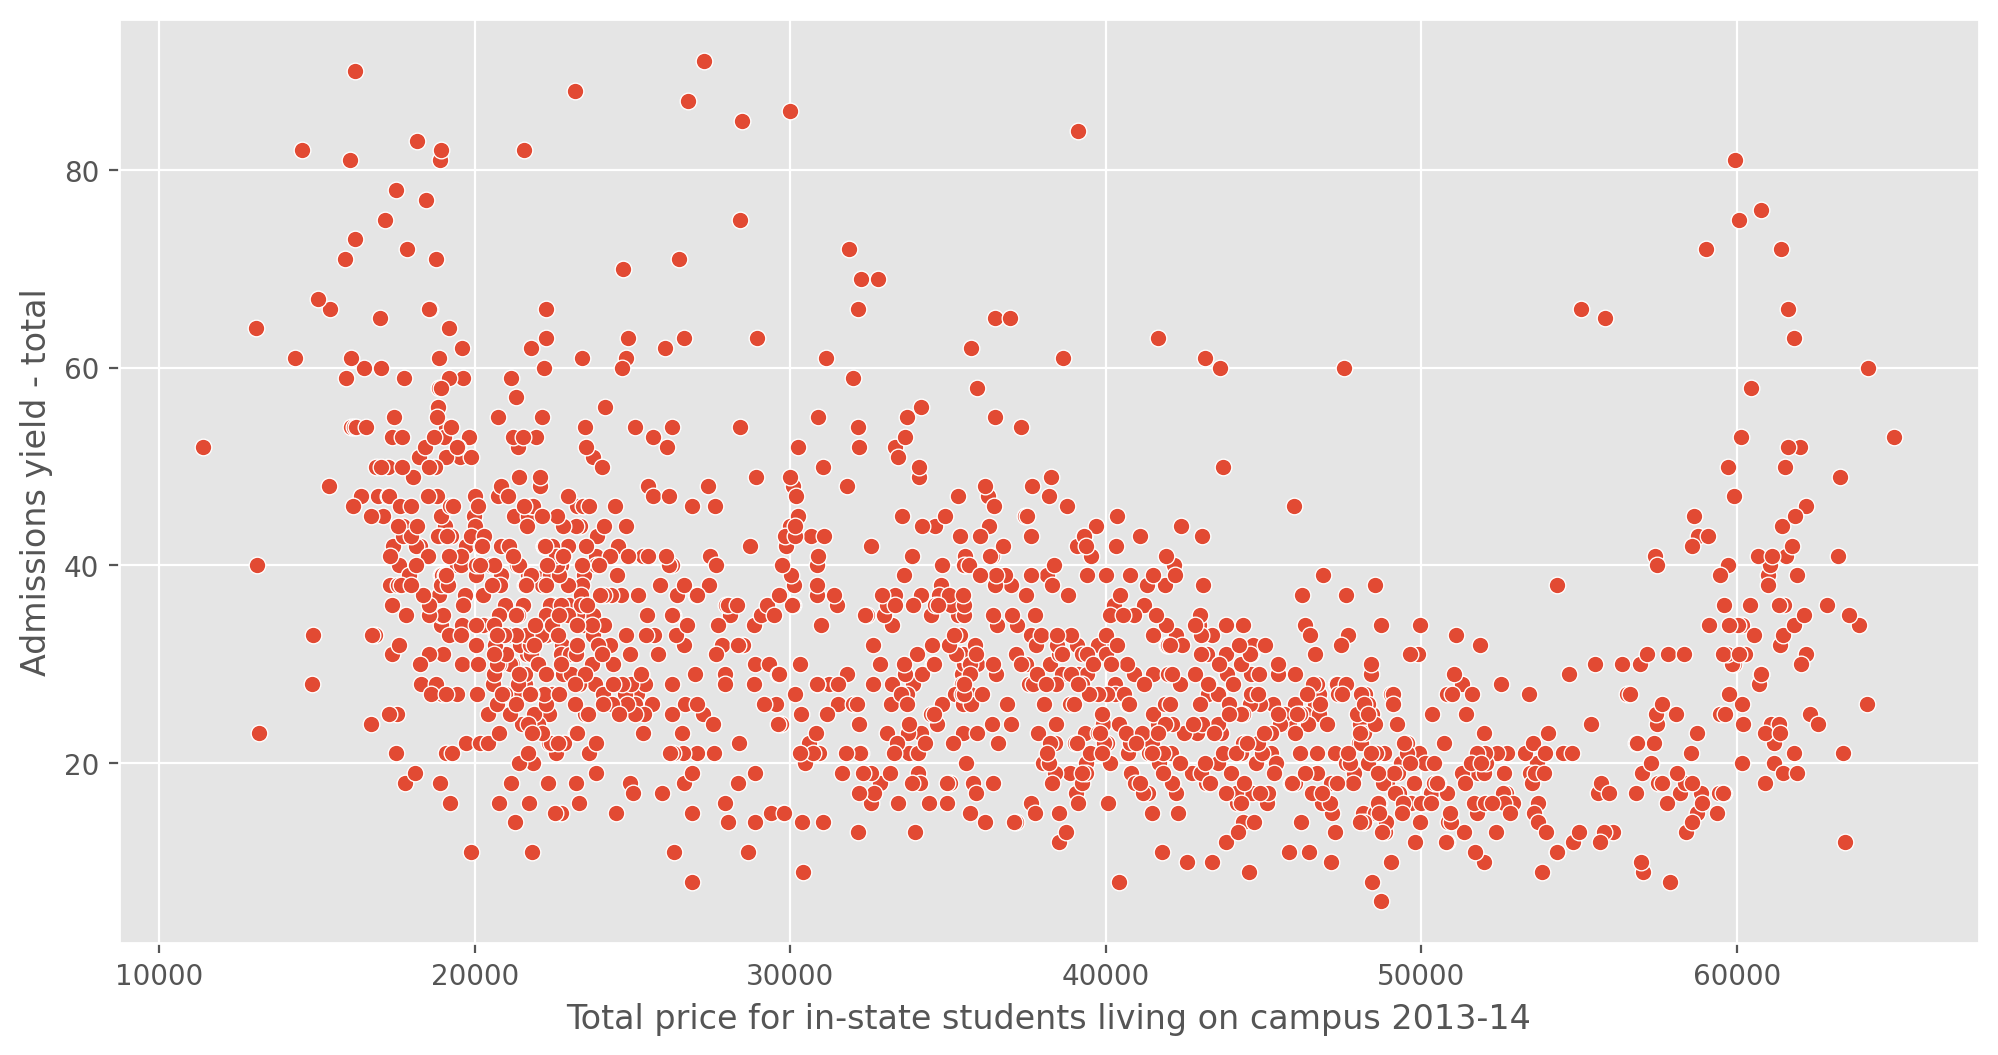

In [44]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=fifth_s, x='Total price for in-state students living on campus 2013-14', y='Admissions yield - total')
plt.show()

In [45]:
fifth_s[['Total price for in-state students living on campus 2013-14', 'Admissions yield - total']].corr()

,Total price for in-state students living on campus 2013-14,Admissions yield - total
Total price for in-state students living on campus 2013-14,1.000000,-0.373761
Admissions yield - total,-0.373761,1.000000


In [46]:
cleaned_df['State abbreviation'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [47]:
sixth_s = cleaned_df[['State abbreviation', 'Admissions yield - total']]
sixth_s.head()

,State abbreviation,Admissions yield - total
0,Alabama,20.0
1,Alabama,36.0
3,Alabama,39.0
4,Alabama,28.0
5,Alabama,37.0


In [48]:
sixth_s['popular state'] = sixth_s['State abbreviation'].apply(lambda x: 1 if x in ['California', 'Florida', 'Texas', 'New York', 'Pennsylvania'] else 0)
sixth_s.head()

,State abbreviation,Admissions yield - total,popular state
0,Alabama,20.0,0
1,Alabama,36.0,0
3,Alabama,39.0,0
4,Alabama,28.0,0
5,Alabama,37.0,0


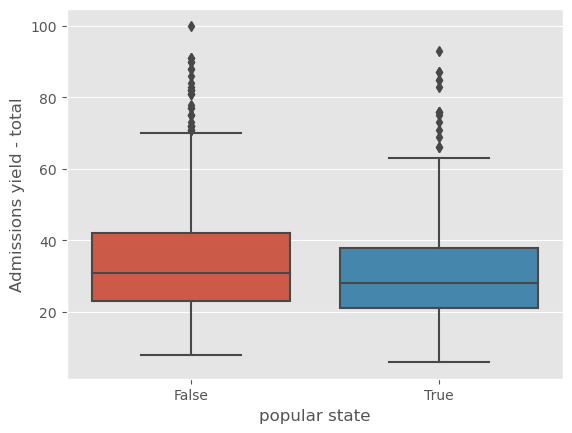

In [49]:
ax = sns.boxplot(data=sixth_s, x='popular state', y='Admissions yield - total')
ax.set_xticklabels(["False", "True"])
plt.show()

In [50]:
degree_offers = ['Offers Less than one year certificate',
                           'Offers One but less than two years certificate', 
                           "Offers Associate's degree",
                           "Offers Two but less than 4 years certificate",
                           'Offers Postbaccalaureate certificate',
                           "Offers Master's degree",
                           "Offers Post-master's certificate",
                           "Offers Doctor's degree - research/scholarship",
                           "Offers Doctor's degree - professional practice",
                           "Offers Doctor's degree - other",
                            'Offers Other degree']

seventh_s = cleaned_df[degree_offers + ['Admissions yield - total']]


seventh_s.head()

,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,Offers Other degree,Admissions yield - total
0,Implied no,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,20.0
1,Implied no,Yes,Implied no,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Implied no,36.0
3,Yes,Implied no,Implied no,Implied no,Yes,Yes,Yes,Yes,Yes,Implied no,Implied no,39.0
4,Implied no,Implied no,Implied no,Implied no,Implied no,Yes,Yes,Yes,Yes,Implied no,Implied no,28.0
5,Implied no,Implied no,Implied no,Implied no,Implied no,Yes,Yes,Yes,Yes,Implied no,Implied no,37.0


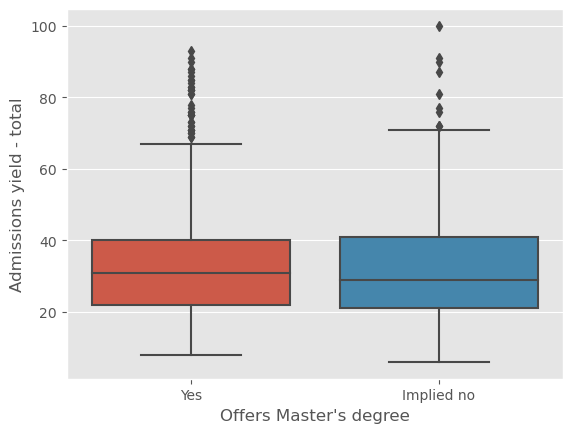

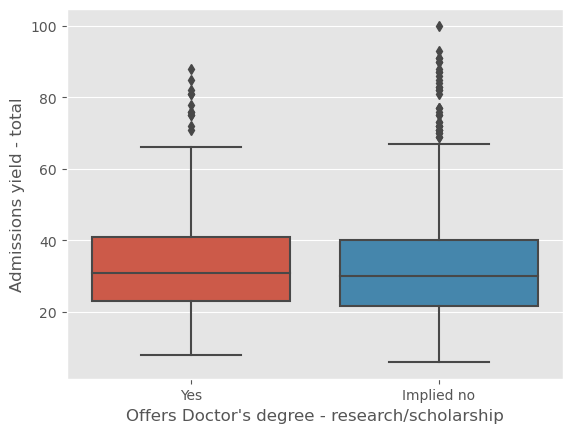

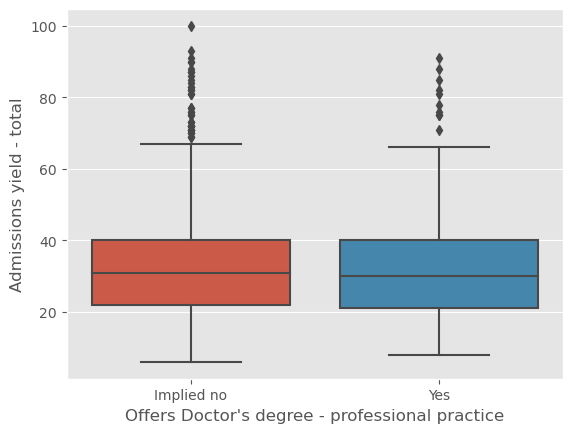

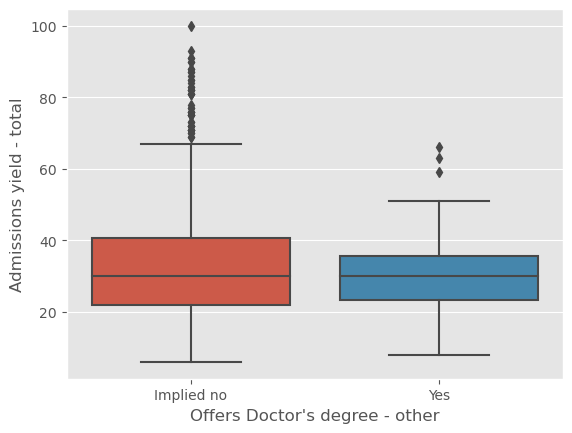

In [51]:
higher_degree = ["Offers Master's degree",
                "Offers Doctor's degree - research/scholarship",
                "Offers Doctor's degree - professional practice",
                "Offers Doctor's degree - other"]

for degree in higher_degree:
    sns.boxplot(data=seventh_s, x=degree, y='Admissions yield - total')
    plt.show()

In [52]:
other_degree = list(set(degree_offers) - set(higher_degree))
other_degree

['Offers Postbaccalaureate certificate',
 'Offers One but less than two years certificate',
 "Offers Post-master's certificate",
 'Offers Less than one year certificate',
 'Offers Other degree',
 'Offers Two but less than 4 years certificate',
 "Offers Associate's degree"]

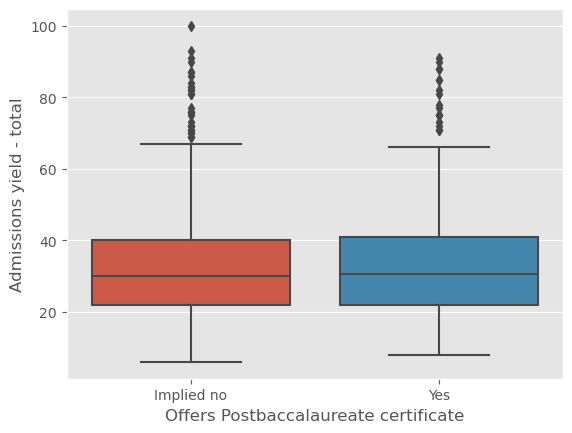

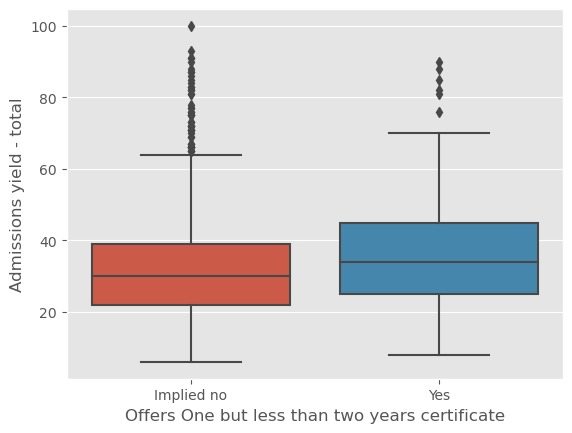

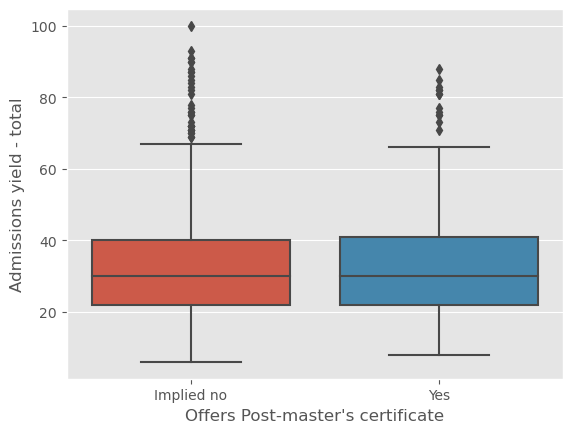

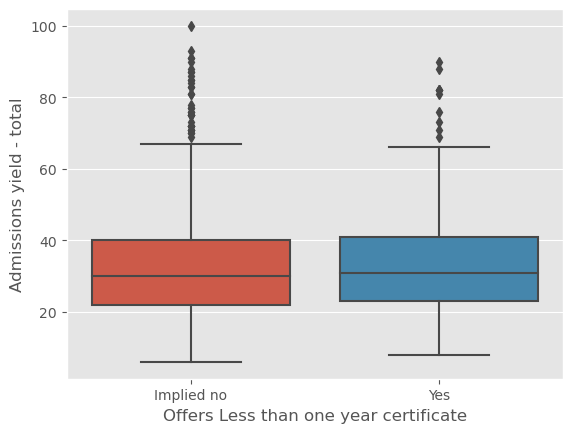

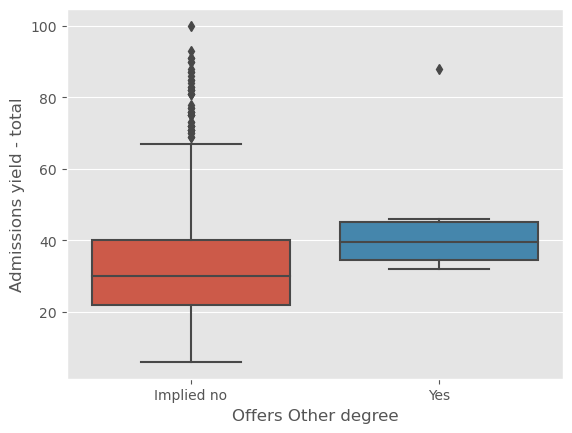

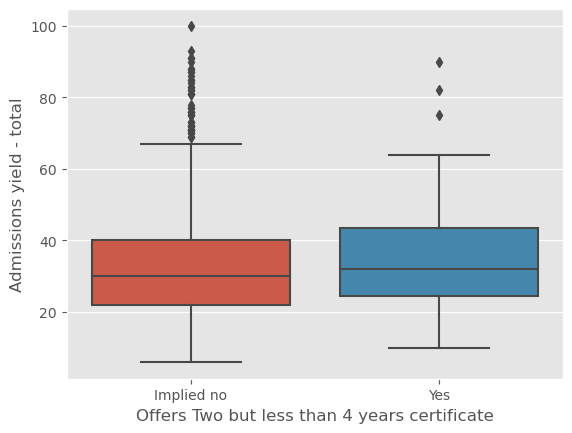

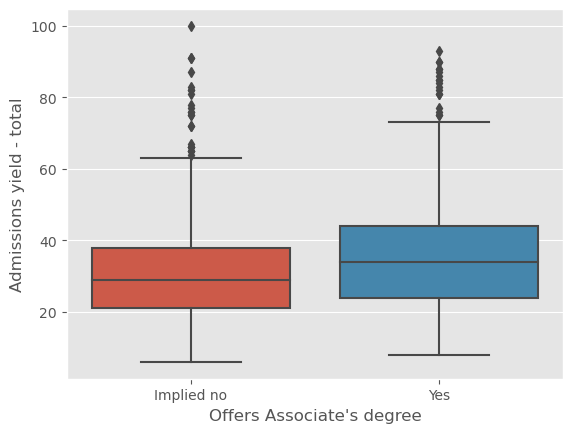

In [54]:
for degree in other_degree:
    sns.boxplot(data=seventh_s, x=degree, y='Admissions yield - total')
    plt.show()